In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("Pizza.csv")#, names = ["price",	"area",	"bedrooms",	"bathrooms",	"stories",	"mainroad",	"guestroom",	"basement",	"hotwaterheating",	"airconditioning",	"parking",	"prefarea",	"semi-furnished",	"unfurnished",	"areaperbedroom",	"bbratio"])
data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [8]:
data["brand"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [9]:
from sklearn.preprocessing import StandardScaler

features = ["mois",	"prot",	"fat",	"ash",	"sodium",	"carb",	"cal"]

x = data.loc[:, features].values

y = data.loc[:,["brand"]].values

x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [11]:
finalDf = pd.concat([principalDf, data[["brand"]]], axis = 1)

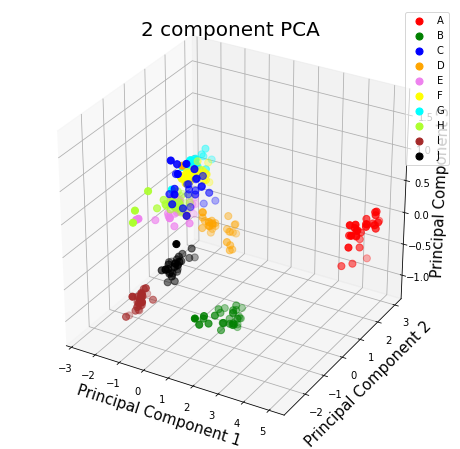

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['red', 'green','blue','orange','violet','yellow','aqua','greenyellow','brown','black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['brand'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [27]:
pca.explained_variance_ratio_

array([0.59596884, 0.3272082 , 0.05922319])